# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Agharini Linda Ariyani
- **Email:** m002b4kx0167@bangkit.academy
- **ID Dicoding:** agharini29

## Menentukan Pertanyaan Bisnis

- Kapan dan pada musim apa jumlah pengguna sepeda paling banyak?
- Pada kondisi bagaimana terjadi penurunan pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [91]:
day = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [92]:
hour = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hour.csv")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- total penyewaan sepeda terhitung lebih banyak pada hari kerja (working day) dibandingkan pada akhir minggu (weekend)
- pengguna yang teregistrasi secara keseluruhan berjumlah lebih banyak dibanding pengguna casual

### Assessing Data

#### Menilai tabel `day`



In [93]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [94]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [95]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [96]:
# IQR (untuk tentukan outlier)

def iqr_day(column):
  Q1 = day[column].quantile(0.25)
  Q3 = day[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  upper_array = np.where(day[column] >= upper)[0]
  lower_array = np.where(day[column] <= lower)[0]

  return upper_array, lower_array

upper_day, lower_day = iqr_day('windspeed')

print("Upper outliers:", upper_day)
print("Lower outliers:", lower_day)

Upper outliers: [ 44  49  93  94 292 382 407 420 432 433 450 666 721]
Lower outliers: []


**Informasi tabel `day`:**

*   memiliki 731 baris dan 16 kolom
*   tidak ada data yang hilang atau null
*   memiliki 4 kolom data tipe float, 11 kolom data tipe integer, dan 1 kolom data tipe object
*   tidak memiliki data duplikasi
*   memiliki 13 data upper outlier pada kolom `windspeed`

#### Menilai tabel `hour`

In [97]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [98]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


In [99]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [100]:
# IQR (untuk tentukan outlier)
def iqr_hour(column):
  Q1 = hour[column].quantile(0.25)
  Q3 = hour[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  upper_array = np.where(hour[column] >= upper)[0]
  lower_array = np.where(hour[column] <= lower)[0]

  return upper_array, lower_array

upper_hour, lower_hour = iqr_hour('hum')

print("Upper outliers:", upper_hour)
print("Lower outliers:", lower_hour)

Upper outliers: []
Lower outliers: [1551 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564
 1565 1566 1567 1568 1569 1570 1571 1572]


In [101]:
upper_hour, lower_hour = iqr_hour('windspeed')

print("Upper outliers:", upper_hour)
print("Lower outliers:", lower_hour)

Upper outliers: [  175   178   194   196   265   271   467   468   469   728   729   730
   731   736   861   862   863   865   869   870   962  1006  1007  1009
  1010  1011  1013  1014  1015  1017  1018  1019  1105  1107  1110  1117
  1118  1119  1120  1121  1122  1123  1124  1125  1126  1127  1130  1131
  1132  1136  1137  1138  1258  1259  1261  1262  1264  1323  1332  1333
  1379  1380  1383  1384  1389  1475  1477  1482  1483  1568  1611  1767
  1773  1873  2124  2153  2154  2155  2156  2157  2159  2167  2171  2172
  2177  2181  2184  2200  2321  2322  2323  2326  2339  2345  2418  2438
  2439  2440  2441  2443  2465  2551  2552  2554  2705  2846  2847  2848
  2861  2895  2897  3328  3564  3570  3571  3821  4315  4316  4523  5048
  5155  5327  5328  5443  5444  5630  5632  5633  5634  5635  5639  5843
  6076  6790  6793  6881  6882  6883  6905  6906  6908  6909  6910  6911
  7085  7086  7087  7125  7126  7269  7435  7436  7438  7487  7726  7731
  8067  8068  8069  8252  8444  846

**Informasi tabel `hour`:**

*   memiliki 17379 baris dan 17 kolom
*   tidak ada data yang hilang atau null
*   memiliki 4 kolom data tipe float, 12 kolom data tipe integer, dan 1 kolom data tipe object
*   tidak memiliki data duplikasi
*   memiliki data lower outlier pada kolom `hum` dan data upper outlier pada kolom `windspeed`

### Cleaning Data

#### Membersihkan tabel `day`

In [102]:
# menghapus outlier

upper_day, lower_day = iqr_day('windspeed')

day.drop(index=upper_day, inplace=True)
day.drop(index=lower_day, inplace=True)
day = day[day['hum'] != 0]

In [103]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,717.000000,717.00000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,366.779637,2.51325,0.499303,6.562064,0.029289,2.995816,0.684798,1.396095,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794
std,210.971354,1.10555,0.500349,3.439113,0.168732,2.001741,0.464921,0.543511,0.183617,0.163155,0.139222,0.071786,689.273998,1557.676255,1933.542429
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,185.000000,2.00000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000
50%,365.000000,3.00000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000
75%,550.000000,3.00000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000
max,731.000000,4.00000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000


**Informasi tabel `day`:**
- data outlier dihapus
- jumlah baris dari 731 menjadi 714

#### Membersihkan tabel `hour`

In [104]:
upper_hour, lower_hour = iqr_hour('hum')

hour.drop(index=upper_hour, inplace=True)
hour.drop(index=lower_hour, inplace=True)

In [105]:
upper_hour, lower_hour = iqr_hour('windspeed')

hour.drop(index=upper_hour, inplace=True)
hour.drop(index=lower_hour, inplace=True)

In [106]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,8719.988129,2.515867,0.502997,6.572873,11.492243,0.028209,3.000470,0.682652,1.421251,0.497815,0.476539,0.628838,0.187709,35.672602,153.961859,189.634462
std,5009.424569,1.103456,0.500006,3.427822,6.921299,0.165574,2.006367,0.465458,0.635537,0.193089,0.172090,0.191006,0.119744,49.257124,151.801898,181.818748
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4393.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8703.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.500000,142.000000
75%,13075.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Informasi tabel `hour`:**
- data outlier dihapus
- jumlah baris dari 17379 menjadi 17016

## Exploratory Data Analysis (EDA)

### Explore tabel `day`

#### Distribusi Pengguna Sepeda per Hari

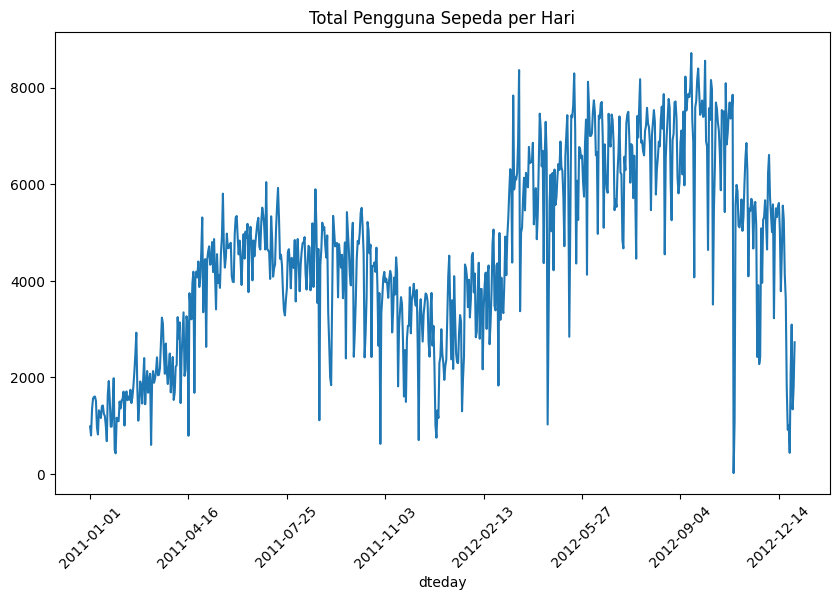

In [107]:
plt.figure(figsize=(10, 6))
day.groupby('dteday')['cnt'].sum().plot()
plt.title('Total Pengguna Sepeda per Hari')
plt.xticks(rotation=45)
plt.show()

#### Distribusi Pengguna Berdasarkan Musim

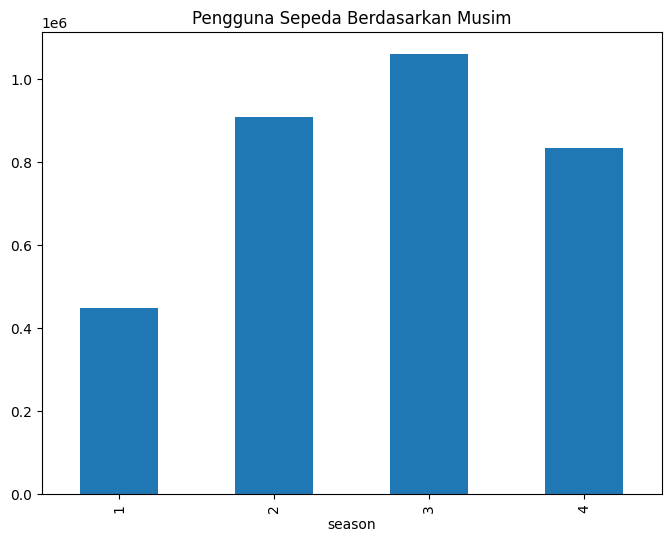

In [108]:
day.groupby('season')['cnt'].sum().plot(kind='bar', figsize=(8,6))
plt.title('Pengguna Sepeda Berdasarkan Musim')
plt.show()

#### Pengaruh Cuaca terhadap Penggunaan

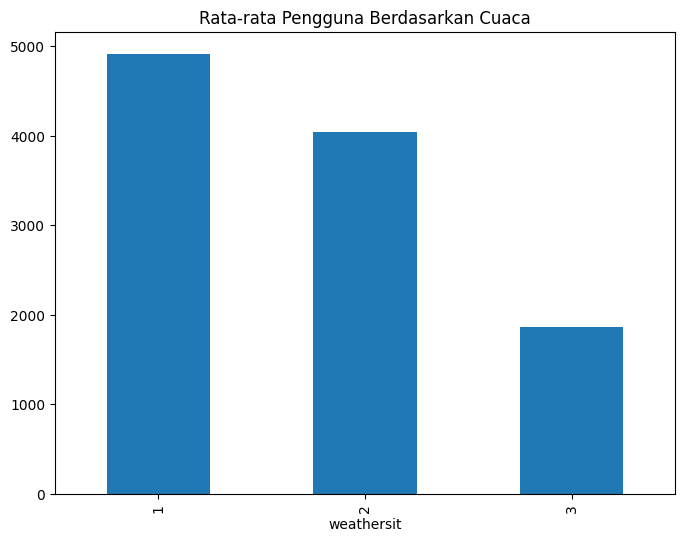

In [109]:
day.groupby('weathersit')['cnt'].mean().plot(kind='bar', figsize=(8,6))
plt.title('Rata-rata Pengguna Berdasarkan Cuaca')
plt.show()

#### Penggunaan Berdasarkan Hari dalam Seminggu

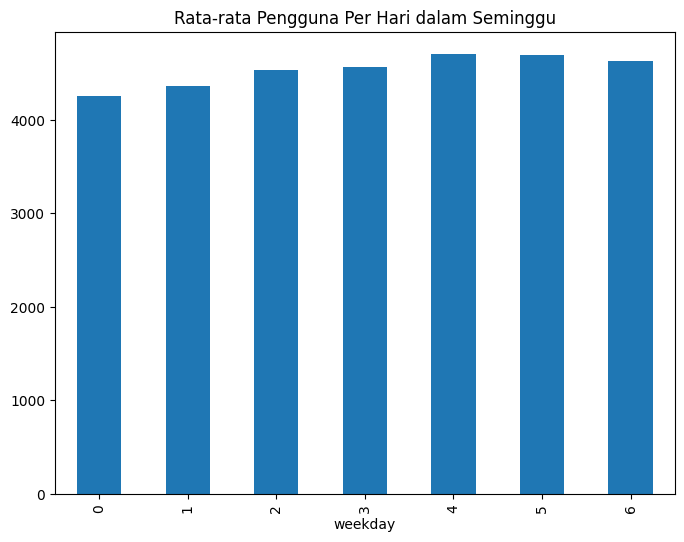

In [110]:
day.groupby('weekday')['cnt'].mean().plot(kind='bar', figsize=(8,6))
plt.title('Rata-rata Pengguna Per Hari dalam Seminggu')
plt.show()

### Explore tabel `hour`

#### Pengguna Berdasarkan Jam

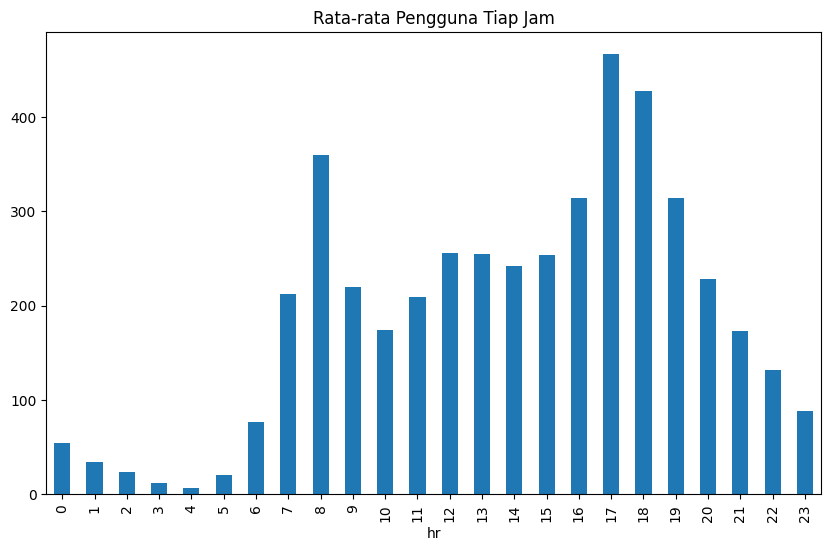

In [111]:
hour.groupby('hr')['cnt'].mean().plot(kind='bar', figsize=(10,6))
plt.title('Rata-rata Pengguna Tiap Jam')
plt.show()

### **Insight EDA:**

- pengguna sepeda berjumlah paling banyak pada kondisi **musim panas dan cuaca cerah**
- pengguna sepeda paling banyak pada jam **5 sore**
- pada **hari kerja/working day** jumlah pengguna sepeda lebih tinggi, terutama oleh pengguna terdaftar
- **suhu hangat** meningkatkan penggunaan sepeda, sementara **kelembapan tinggi dan kecepatan angin tinggi** cenderung menguranginya

## Visualization & Explanatory Analysis

### Kapan dan pada musim apa jumlah pengguna sepeda paling banyak?

#### Distribusi Pengguna Berdasarkan Jam

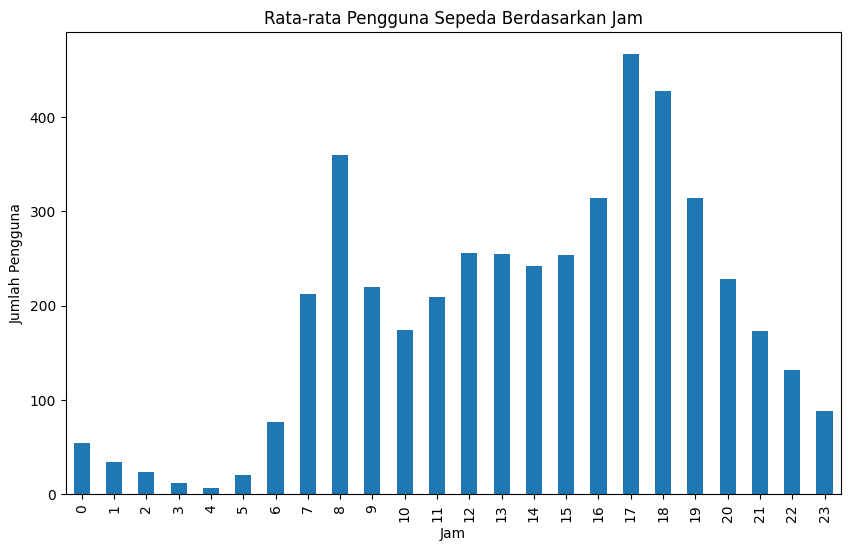

In [112]:
plt.figure(figsize=(10,6))
hour.groupby('hr')['cnt'].mean().plot(kind='bar')
plt.title('Rata-rata Pengguna Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.show()

#### Distribusi Pengguna Berdasarkan Hari

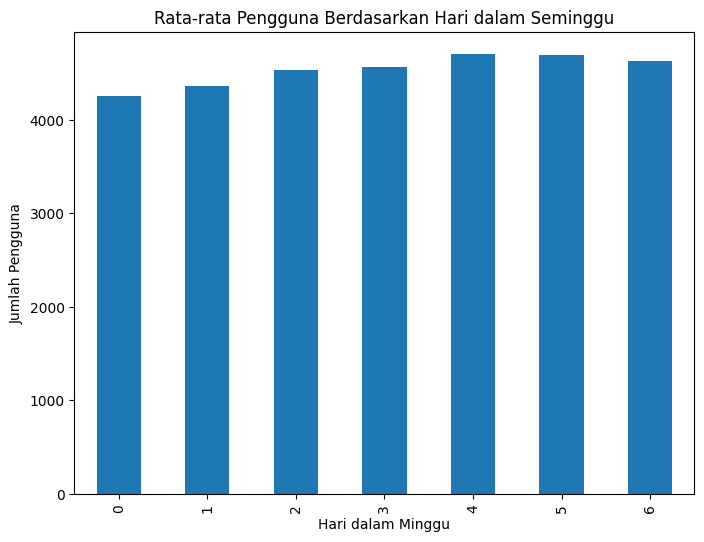

In [113]:
plt.figure(figsize=(8,6))
day.groupby('weekday')['cnt'].mean().plot(kind='bar')
plt.title('Rata-rata Pengguna Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Pengguna')
plt.show()

#### Penggunaan Sepeda Berdasarkan Musim

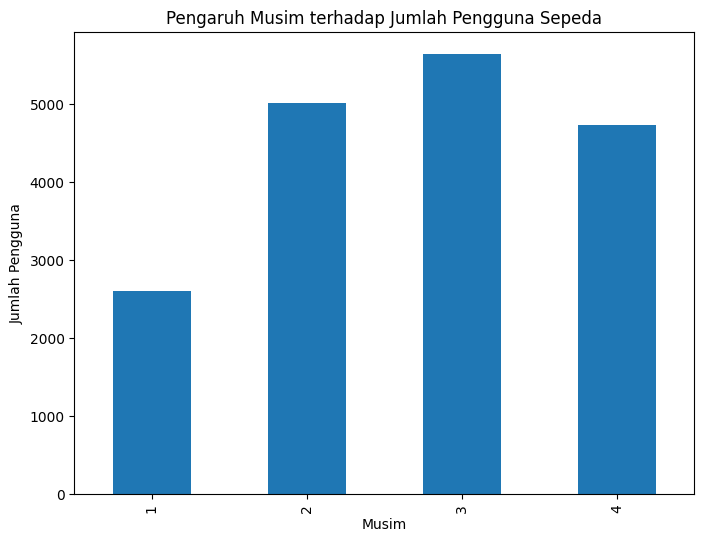

In [114]:
plt.figure(figsize=(8,6))
day.groupby('season')['cnt'].mean().plot(kind='bar')
plt.title('Pengaruh Musim terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna')
plt.show()

### Pada kondisi bagaimana terjadi penurunan pengguna sepeda?

#### Rata-rata Pengguna Berdasarkan Situasi Cuaca

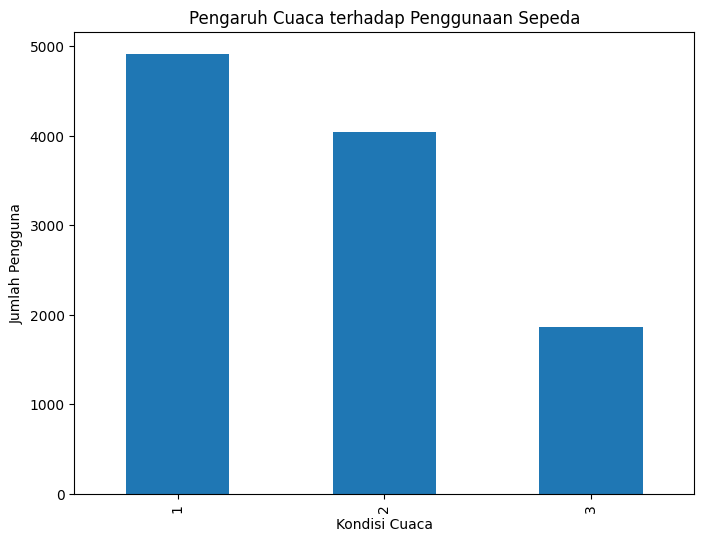

In [115]:
plt.figure(figsize=(8,6))
day.groupby('weathersit')['cnt'].mean().plot(kind='bar')
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.show()

#### Pengaruh Suhu Terhadap Jumlah Pengguna

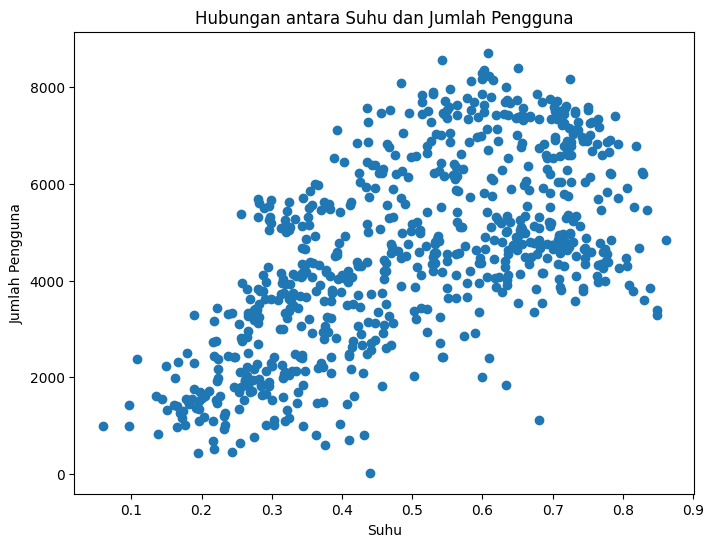

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(day['temp'], day['cnt'])
plt.title('Hubungan antara Suhu dan Jumlah Pengguna')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengguna')
plt.show()

#### Pengaruh Kelembapan Terhadap Jumlah Pengguna

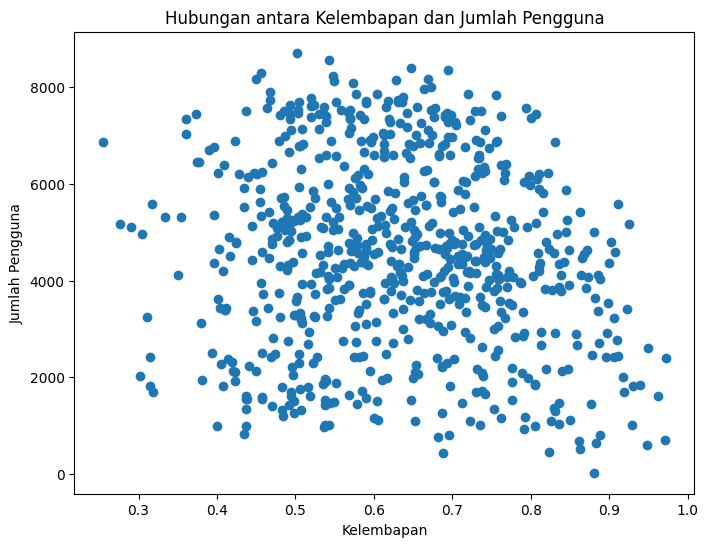

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(day['hum'], day['cnt'])
plt.title('Hubungan antara Kelembapan dan Jumlah Pengguna')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Pengguna')
plt.show()

### **Insight Explanatory Analysis:**

- Waktu puncak penggunaan sepeda terjadi pada **pagi hari**: sekitar jam 8 pagi dan **sore hari**: sekitar jam 5 hingga 6 sore.

- Cuaca memiliki pengaruh signifikan terhadap jumlah pengguna sepeda:
  1. **Cuaca cerah atau berawan (kode 1)**: Jumlah pengguna sepeda cenderung lebih tinggi.
  2. **Cuaca berkabut atau mendung (kode 2)**: Jumlah pengguna sepeda sedikit menurun.
  3. **Hujan ringan atau salju ringan (kode 3)**: Jumlah pengguna sepeda menurun lebih drastis.
  4. **Hujan deras atau salju deras (kode 4)**: Jumlah pengguna sepeda sangat rendah.

- Suhu dan kelembapan juga mempengaruhi penggunaan sepeda:
  1. **Suhu**: Penggunaan sepeda cenderung meningkat pada suhu yang lebih hangat, tetapi tidak terlalu panas. Suhu yang terlalu tinggi atau terlalu rendah dapat mengurangi jumlah pengguna.
  2. **Kelembapan**: Kelembapan yang sangat tinggi atau sangat rendah dapat mengurangi kenyamanan bersepeda, sehingga jumlah pengguna cenderung menurun pada kondisi kelembapan ekstrem.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: Pengguna sepeda paling banyak pada jam 8 pagi dan jam 5 hingga 6 sore. Pengguna sepeda paling banyak terjadi pada musim gugur.
- Conclusion pertanyaan 2: Pengguna sepeda mengalami penurunan drastis pada kondisi hujan deras atau salju deras, suhu yang terlalu panas atau terlalu dingin, dan pada kelembapan ekstrem.

In [118]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.3
aiohttp==3.10.8
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.16
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.19.0
astropy==6.1.4
astropy-iers-data==0.2024.9.30.0.32.59
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bigframes==1.19.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
Bottleneck==1.4.0
bqplot==0.12.43
branca==0.8.0
build==1.2.2
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.87
clarabel==0.9.0
click==8.1.7
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.4
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6


In [119]:
day.to_csv("day.csv", index=False)
hour.to_csv("hour.csv", index=False)